In [1]:
import os
import os.path as op
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid", color_codes=True)
sns.set(font_scale=1.35, style="ticks") #set styling preferences
import statsmodels.api as sm
from scipy import stats
import math
from math import pi
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from scipy.spatial.distance import cdist
from scipy.cluster.vq import kmeans2,vq, whiten
import geopandas as gpd
import h5py
import boto.s3
import glob    
import boto3
from zipfile import ZipFile
import shutil
import econtools.metrics as mt

In [2]:
# Show all columns and rows
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
# Showing the entire number in dataframe
pd.set_option('float_format', '{:f}'.format)

#### Reading all the csv files

In [4]:
def read_csv_files():
    sf_rh_base_0p01 = pd.read_csv('gs://beam-core-outputs/wheelchair/may2023/sfbay-10pop-1fleet-v3/inexus/output/sfbay_baseline_default-1.0_2019__20230719.csv.gz', compression = 'gzip')    # Adding scenario info
    sf_rh_base_0p01['scenario'] = "baseline"
    sf_rh_base_0p01['scenario'] = sf_rh_base_0p01['scenario'].astype("category")
    sf_rh_base_0p01['lever'] = "WAV"
    sf_rh_base_0p01['lever'] = sf_rh_base_0p01['lever'].astype("category")
    sf_rh_base_0p01['year'] = 2018
    sf_rh_base_0p01['lever_position_wav'] = 0.01      
    
    sf_wav_5 = pd.read_csv('gs://beam-core-outputs/wheelchair/may2023/sfbay-10pop-5fleet/inexus/sfbay_baseline_default-1.0_2019__20230513.csv.gz', compression = 'gzip')
    # Adding scenario info
    sf_wav_5['scenario'] = "ridehail"
    sf_wav_5['scenario'] = sf_wav_5['scenario'].astype("category")
    sf_wav_5['lever'] = "WAV"
    sf_wav_5['lever'] = sf_wav_5['lever'].astype("category")
    sf_wav_5['year'] = 2018
    sf_wav_5['lever_position_wav'] = 0.05      
    
    sf_wav_10 = pd.read_csv('gs://beam-core-outputs/wheelchair/may2023/sfbay-10pop-10fleet/inexus/sfbay_baseline_default-1.0_2019__20230521.csv.gz', compression = 'gzip')
    # Adding scenario info
    sf_wav_10['scenario'] = "ridehail"
    sf_wav_10['scenario'] = sf_wav_10['scenario'].astype("category")
    sf_wav_10['lever'] = "WAV"   
    sf_wav_10['lever'] = sf_wav_10['lever'].astype("category")
    sf_wav_10['year'] = 2018
    sf_wav_10['lever_position_wav'] = 0.1        
    
    sf_wav_20 = pd.read_csv('gs://beam-core-outputs/wheelchair/may2023/sfbay-10pop-20fleet-v2/inexus/sfbay_baseline_default-1.0_2019__20230710.csv.gz', compression = 'gzip')
    # Adding scenario info
    sf_wav_20['scenario'] = "ridehail"
    sf_wav_20['scenario'] = sf_wav_10['scenario'].astype("category")
    sf_wav_20['lever'] = "WAV"
    sf_wav_20['lever'] = sf_wav_10['lever'].astype("category")
    sf_wav_20['year'] = 2018
    sf_wav_20['lever_position_wav'] = 0.2
    
    sf_wav_50 = pd.read_csv('gs://beam-core-outputs/wheelchair/may2023/sfbay-10pop-50fleet/inexus/sfbay_baseline_default-1.0_2019__20230720.csv.gz', compression = 'gzip')
    # Adding scenario info
    sf_wav_50['scenario'] = "ridehail"
    sf_wav_50['scenario'] = sf_wav_50['scenario'].astype("category")
    sf_wav_50['lever'] = "WAV"
    sf_wav_50['lever'] = sf_wav_50['lever'].astype("category")
    sf_wav_50['year'] = 2018
    sf_wav_50['lever_position_wav'] = 0.5
    
    sf_wav_100 = pd.read_csv('gs://beam-core-outputs/wheelchair/may2023/sfbay-10pop-100fleet-v2/inexus/output/sfbay_baseline_default-1.0_2019__20230726.csv.gz', compression = 'gzip')
    # Adding scenario info
    sf_wav_100['scenario'] = "ridehail"
    sf_wav_100['scenario'] = sf_wav_100['scenario'].astype("category")
    sf_wav_100['lever'] = "WAV"
    sf_wav_100['lever'] = sf_wav_100['lever'].astype("category")
    sf_wav_100['year'] = 2018
    sf_wav_100['lever_position_wav'] = 1
    
    return (sf_rh_base_0p01, sf_wav_5, sf_wav_10, sf_wav_20, sf_wav_50, sf_wav_100)

In [5]:
%%time 
# Call the function and assign the returned values to variables
sf_rh_base_0p01, sf_wav_5, sf_wav_10, sf_wav_20, sf_wav_50, sf_wav_100 = read_csv_files()

C:\Users\nrezaei\AppData\Local\Temp\3\ipykernel_15348\3974855443.py:2: DtypeWarning: Columns (77,131,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,158,167,172,174,175,176,177,179,180,237,238,239,240,249) have mixed types. Specify dtype option on import or set low_memory=False.
  sf_rh_base_0p01 = pd.read_csv('gs://beam-core-outputs/wheelchair/may2023/sfbay-10pop-1fleet-v3/inexus/output/sfbay_baseline_default-1.0_2019__20230719.csv.gz', compression = 'gzip')    # Adding scenario info
C:\Users\nrezaei\AppData\Local\Temp\3\ipykernel_15348\3974855443.py:10: DtypeWarning: Columns (77,131,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,158,167,172,174,175,176,177,179,180,237,238,239,240,249) have mixed types. Specify dtype option on import or set low_memory=False.
  sf_wav_5 = pd.read_csv('gs://beam-core-outputs/wheelchair/may2023/sfbay-10pop-5fleet/inexus/sfbay_baseline_default-1.0_2019__20230513.csv.gz', compression = 'gzip')
C:\Use

CPU times: total: 7h 49min 56s
Wall time: 8h 4min 9s


#### Baseline (No need to run if the function above was run)

In [3]:
%%time  
sf_rh_base_0p01 = pd.read_csv('gs://beam-core-outputs/wheelchair/may2023/sfbay-10pop-1fleet/inexus/sfbay_baseline_default-1.0_2019__20230529.csv.gz', compression = 'gzip')

<timed exec>:1: DtypeWarning: Columns (77,131,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,158,167,172,174,175,176,177,179,180,237,238,239,240,249) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: total: 13min 54s
Wall time: 16min 30s


In [5]:
# Adding scenario info
sf_rh_base_0p01['scenario'] = "baseline"
sf_rh_base_0p01['scenario'] = sf_rh_base_0p01['scenario'].astype("category")
sf_rh_base_0p01['lever'] = "WAV"
sf_rh_base_0p01['lever'] = sf_rh_base_0p01['lever'].astype("category")
sf_rh_base_0p01['year'] = 2018
sf_rh_base_0p01['lever_position_wav'] = 0.01

In [6]:
#baseline2018 = "https://beam-core-act.s3.amazonaws.com/beam-outputs/pilates-outputs/sfbay-baseline-20221220/inexus"
#sfbase = pd.read_csv(baseline2018 + 'sfbay_baseline_default-1.0_2012__20221219.csv.gz')

#### Ridehail Price Scenarios (No need to run if the function above was run)

In [10]:
%%time  
sf_wav_5 = pd.read_csv('gs://beam-core-outputs/wheelchair/may2023/sfbay-10pop-5fleet/inexus/sfbay_baseline_default-1.0_2019__20230513.csv.gz', compression = 'gzip')

<timed exec>:1: DtypeWarning: Columns (77,131,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,158,167,172,174,175,176,177,179,180,237,238,239,240,249) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: total: 41min 8s
Wall time: 43min 35s


In [11]:
# Adding scenario info
sf_wav_5['scenario'] = "ridehail"
sf_wav_5['scenario'] = sf_wav_5['scenario'].astype("category")
sf_wav_5['lever'] = "WAV"
sf_wav_5['lever'] = sf_wav_5['lever'].astype("category")
sf_wav_5['year'] = 2018
sf_wav_5['lever_position_wav'] = 0.05

In [12]:
%%time
sf_wav_10 = pd.read_csv('gs://beam-core-outputs/wheelchair/may2023/sfbay-10pop-10fleet/inexus/sfbay_baseline_default-1.0_2019__20230521.csv.gz', compression = 'gzip')

<timed exec>:1: DtypeWarning: Columns (77,131,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,158,167,172,174,175,176,177,179,180,237,238,239,240,249) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: total: 1h 3min 47s
Wall time: 1h 6min 41s


In [13]:
# Adding scenario info
sf_wav_10['scenario'] = "ridehail"
sf_wav_10['scenario'] = sf_wav_10['scenario'].astype("category")
sf_wav_10['lever'] = "WAV"
sf_wav_10['lever'] = sf_wav_10['lever'].astype("category")
sf_wav_10['year'] = 2018
sf_wav_10['lever_position_wav'] = 0.1

In [14]:
%%time 
sf_wav_20 = pd.read_csv('gs://beam-core-outputs/wheelchair/may2023/sfbay-10pop-20fleet/inexus/sfbay_baseline_default-1.0_2019__20230521.csv.gz', compression = 'gzip')

<timed exec>:1: DtypeWarning: Columns (77,131,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,158,167,172,174,175,176,177,179,180,237,238,239,240,249) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: total: 1h 17min 12s
Wall time: 1h 18min 49s


In [15]:
# Adding scenario info
sf_wav_20['scenario'] = "ridehail"
sf_wav_20['scenario'] = sf_wav_10['scenario'].astype("category")
sf_wav_20['lever'] = "WAV"
sf_wav_20['lever'] = sf_wav_10['lever'].astype("category")
sf_wav_20['year'] = 2018
sf_wav_20['lever_position_wav'] = 0.2

In [16]:
%%time 
sf_wav_50 = pd.read_csv('gs://beam-core-outputs/wheelchair/may2023/sfbay-10pop-50fleet/inexus/sfbay_baseline_default-1.0_2018__20230527.csv.gz', compression = 'gzip')

CPU times: total: 1h 28min 8s
Wall time: 1h 30min 46s


In [17]:
# Adding scenario info
sf_wav_50['scenario'] = "ridehail"
sf_wav_50['scenario'] = sf_wav_50['scenario'].astype("category")
sf_wav_50['lever'] = "WAV"
sf_wav_50['lever'] = sf_wav_50['lever'].astype("category")
sf_wav_50['year'] = 2018
sf_wav_50['lever_position_wav'] = 0.5

In [18]:
%%time  
sf_wav_100 = pd.read_csv('gs://beam-core-outputs/wheelchair/may2023/sfbay-10pop-100fleet/inexus/sfbay_baseline_default-1.0_2019__20230501.csv.gz', compression = 'gzip')

<timed exec>:1: DtypeWarning: Columns (77,131,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,158,167,172,174,175,176,177,179,180,237,238,239,240,249) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: total: 1h 43min 49s
Wall time: 1h 46min 15s


In [19]:
# Adding scenario info
sf_wav_100['scenario'] = "ridehail"
sf_wav_100['scenario'] = sf_wav_100['scenario'].astype("category")
sf_wav_100['lever'] = "WAV"
sf_wav_100['lever'] = sf_wav_100['lever'].astype("category")
sf_wav_100['year'] = 2018
sf_wav_100['lever_position_wav'] = 1

In [20]:
#sf_rh_flsz_175 = sf_rh_flsz_175.drop(sf_rh_flsz_175.columns[233:235], axis=1)

#### Stacked File

In [6]:
frames = [sf_rh_base_0p01, sf_wav_5, sf_wav_10, sf_wav_20, sf_wav_50, sf_wav_100]
sf_stacked = pd.concat(frames)

In [9]:
sf_stacked = sf_stacked.drop(['has_school_kid','has_preschool_kid','has_retiree','has_non_worker','adult','hispanic','relate',
                              'pstudent','pemploy','ptype','p_hispanic','age_16_p','age_16_to_19',
                              'person_age','MAR','hours','hispanic.1','student',
                              'worker','stop_frequency','composition','tdd','number_of_participants','tour_type_count',
                              'tour_type_num','tour_num','tour_count', 'outbound', 'trip_num','num_under16_not_at_school',
                              'family','non_family','num_young_adults','num_college_age','num_children_16_to_17',
                              'num_children_5_to_15','num_young_children',
                              'vehicleIds_estimate','parent_tour_id','atwork_subtour_frequency','household_id_y',
                              'male','female', 'has_driving_kid','has_full_time','has_part_time',
                              'has_university','student_is_employed', 'nonstudent_to_school', 'is_student','is_gradeschool',
                              'is_gradeschool','is_highschool','is_university','school_segment','is_worker',  
                              'distance_to_school','roundtrip_auto_time_to_school',
                              'distance_to_work','workplace_in_cbd', 'work_taz_area_type', 'hh_race_of_head',
                              'roundtrip_auto_time_to_work','work_auto_savings_ratio','cdap_activity', 'travel_active', 
                              'under16_not_at_school','has_preschool_kid_at_home', 'gt2','hispanic_head',
                              'has_school_kid_at_home','work_and_school_and_worker', 'age_of_head', 'race_of_head',
                              'work_and_school_and_student', 'VEHICL','hh_children','hh_age_of_head','num_workers',
                              'gt55', 'recent_mover', 'hh_workers', 'hispanic_status_of_head', 'hh_seniors', 
                              'hh_type', 'HHT', 'sample_rate', 'chunk_id', 'income_segment', 'num_non_workers', 
                              'num_drivers', 'num_adults', 'num_children', 'hh_work_auto_savings_ratio', 'num_travel_active', 
                              'num_travel_active_adults','num_travel_active_preschoolers', 'num_travel_active_children', 
                              'num_travel_active_non_preschoolers', 'participates_in_jtf_model', 'joint_tour_frequency',
                              'num_hh_joint_tours', 'serialno', 'sf_detached', 'household_id_x','destination_logsum_y','logsum_tours_mode_AS_tours',
                              'primary_purpose_y','PNUM','work_auto_savings','mandatory_tour_frequency',
                              'num_work_tours','num_joint_tours', 'non_mandatory_tour_frequency',
                              'num_non_mand','num_escort_tours','num_eatout_tours','num_shop_tours',
                              'num_maint_tours','num_discr_tours','num_social_tours','num_non_escort_tours',
                              'Unnamed: 0.1','Unnamed: 0',
                              'median_value_of_time','tenure',
                              'tenure_mover','emissionFood','emissionElectricity','emissionDiesel',
                             'emissionGasoline','emissionBiodiesel','fuelFood','fuelElectricity',
                             'fuelBiodiesel','fuel_not_Food','fuelDiesel','transit_rail','transit_bus',
                             'ride_hail_pooled','transit_cable_car','transit_tram','transit_subway',
                             'parkingType','transit_cable_car','transit_tram','transit_subway',
                             'trip_count', 'mode_choice_actual_5','distance_mode_choice',
                              'hh_income' ,'num_mand','free_parking_at_work',
                              'workplace_location_logsum',
                             'workplace_taz','school_taz','work_zone_id','work_at_home','race_id', 'school_zone_id',
                             'edu','sex','earning','tour_mode_AS_tours', 
                             'tour_id','household_id','person_id', 'fuelGasoline'], axis=1)

In [159]:
# This command triggers a garbage collection process, attempting to free up memory by clearing unused objects.
import gc
gc.collect()

1368

In [160]:
#sf_stacked = sf_stacked.sort_values(by=['IDMerged', 'tripIndex', 'lever_position_wav']).reset_index(drop=True)

In [161]:
sf_stacked['door_to_door_time_relative_to_baseline'] = sf_stacked['duration_door_to_door'] - (sf_stacked['duration_door_to_door'].where(sf_stacked['lever_position_wav'].eq(0.01))
                                                                                                  .groupby([sf_stacked['IDMerged'],sf_stacked['tripIndex']])
                                                                                                   .transform('first')
                                                                                                   .convert_dtypes())

In [15]:
# Add the mandatory category column
mandatory = ['work' , 'univ', 'school']
sf_stacked['mandatoryCat'] = np.where((sf_stacked.actEndType.isin(mandatory)) & (sf_stacked.actStartType.isin(mandatory)), 'from_M_to_M' , None)

In [16]:
sf_stacked['mandatoryCat'] = np.where((sf_stacked.actEndType == 'Home') & (sf_stacked.actStartType.isin(mandatory)), 'from_H_to_M' , sf_stacked['mandatoryCat'])

In [17]:
sf_stacked['mandatoryCat'] = np.where((sf_stacked.actEndType.isin(mandatory)) & (sf_stacked.actStartType == "Home"), 'from_M_to_H' , sf_stacked['mandatoryCat'])

In [18]:
non_mandatory = ['othmaint' , 'othdiscr', 'escort', 'eatout', 'social', 'shopping', 'atwork']
sf_stacked['mandatoryCat'] = np.where((sf_stacked.actEndType.isin(non_mandatory)) & (sf_stacked.actStartType.isin(non_mandatory)), 'from_N_to_N' , sf_stacked['mandatoryCat'])

In [76]:
#%%time
#sf_stacked_tr_fr.to_csv('s3://beam-core-act/deepDive/CleanData/SanFrancisco/Stacked/sf_2018_stacked_tr_fr_v3.csv', index=False)

In [19]:
sf_stacked[sf_stacked['SHARED3FREE'].isna()].shape

(561521, 117)

In [20]:
sf_stacked = sf_stacked[sf_stacked['income'].notna()]

In [44]:
# add a lower and upper range for the bins in pd.cut
#quartiles = [0] + quartiles + [float('inf')]

In [45]:
# add a quartiles column to groups, using pd.cut
#sf_stacked['income_quartiles'] = pd.cut(sf_stacked['income'], bins=quartiles, labels=['1stQ', '2ndQ', '3rdQ', '4thQ'])

In [21]:
sf_stacked['socialCarbonCost'] = sf_stacked['emission_marginal']*185 # 51 or 102

In [41]:
# Mapping BEAM and ASIM modes
conditions  = [(sf_stacked['mode_choice_actual_BEAM'] == 'walk')&(sf_stacked['trip_mode_AS_trips'] == 'WALK'),
               (sf_stacked['mode_choice_actual_BEAM'] == 'bike')&(sf_stacked['trip_mode_AS_trips'] == 'BIKE'),
               (sf_stacked['mode_choice_actual_BEAM'] == 'hov3_teleportation')&(sf_stacked['trip_mode_AS_trips'] == 'SHARED3FREE'),
               (sf_stacked['mode_choice_actual_BEAM'] == 'hov3_teleportation')&(sf_stacked['trip_mode_AS_trips'] == 'SHARED3PAY'),
               (sf_stacked['mode_choice_actual_BEAM'] == 'car_hov3')&(sf_stacked['trip_mode_AS_trips'] == 'SHARED3FREE'),
               (sf_stacked['mode_choice_actual_BEAM'] == 'car_hov3')&(sf_stacked['trip_mode_AS_trips'] == 'SHARED3PAY'),
               (sf_stacked['mode_choice_actual_BEAM'] == 'hov2_teleportation')&(sf_stacked['trip_mode_AS_trips'] == 'SHARED2FREE'),
               (sf_stacked['mode_choice_actual_BEAM'] == 'hov2_teleportation')&(sf_stacked['trip_mode_AS_trips'] == 'SHARED2PAY'),
               (sf_stacked['mode_choice_actual_BEAM'] == 'car_hov2')&(sf_stacked['trip_mode_AS_trips'] == 'SHARED2PAY'),
               (sf_stacked['mode_choice_actual_BEAM'] == 'car_hov2')&(sf_stacked['trip_mode_AS_trips'] == 'SHARED2FREE'),
               (sf_stacked['mode_choice_actual_BEAM'] == 'car')&(sf_stacked['trip_mode_AS_trips'] == 'DRIVEALONEFREE'),
               (sf_stacked['mode_choice_actual_BEAM'] == 'car')&(sf_stacked['trip_mode_AS_trips'] == 'DRIVEALONEPAY'),
               (sf_stacked['mode_choice_actual_BEAM'] == 'walk_transit')&(sf_stacked['trip_mode_AS_trips'] == 'WALK_LRF'),
               (sf_stacked['mode_choice_actual_BEAM'] == 'walk_transit')&(sf_stacked['trip_mode_AS_trips'] == 'WALK_LOC'),
               (sf_stacked['mode_choice_actual_BEAM'] == 'walk_transit')&(sf_stacked['trip_mode_AS_trips'] == 'WALK_EXP'),
               (sf_stacked['mode_choice_actual_BEAM'] == 'walk_transit')&(sf_stacked['trip_mode_AS_trips'] == 'WALK_HVY'),
               (sf_stacked['mode_choice_actual_BEAM'] == 'walk_transit')&(sf_stacked['trip_mode_AS_trips'] == 'WALK_COM'),
               (sf_stacked['mode_choice_actual_BEAM'] == 'ride_hail')&(sf_stacked['trip_mode_AS_trips'] == 'TNC_SINGLE'),
               (sf_stacked['mode_choice_actual_BEAM'] == 'ride_hail')&(sf_stacked['trip_mode_AS_trips'] == 'TNC_SHARED'),
               (sf_stacked['mode_choice_actual_BEAM'] == 'ride_hail')&(sf_stacked['trip_mode_AS_trips'] == 'TAXI'),
               (sf_stacked['mode_choice_actual_BEAM'] == 'drive_transit')&(sf_stacked['trip_mode_AS_trips'] == 'DRIVE_COM'),
               (sf_stacked['mode_choice_actual_BEAM'] == 'drive_transit')&(sf_stacked['trip_mode_AS_trips'] == 'DRIVE_LRF'),
               (sf_stacked['mode_choice_actual_BEAM'] == 'drive_transit')&(sf_stacked['trip_mode_AS_trips'] == 'DRIVE_LOC'),
               (sf_stacked['mode_choice_actual_BEAM'] == 'drive_transit')&(sf_stacked['trip_mode_AS_trips'] == 'DRIVE_EXP'),
               (sf_stacked['mode_choice_actual_BEAM'] == 'drive_transit')&(sf_stacked['trip_mode_AS_trips'] == 'DRIVE_HVY'),
               (sf_stacked['mode_choice_actual_BEAM'] == 'ride_hail_pooled')&(sf_stacked['trip_mode_AS_trips'] == 'TNC_SINGLE'),
               (sf_stacked['mode_choice_actual_BEAM'] == 'ride_hail_pooled')&(sf_stacked['trip_mode_AS_trips'] == 'TNC_SHARED'),
               (sf_stacked['mode_choice_actual_BEAM'] == 'ride_hail_pooled')&(sf_stacked['trip_mode_AS_trips'] == 'TAXI'),
       
               (sf_stacked['mode_choice_actual_BEAM'] == 'hov2_teleportation')&((sf_stacked['trip_mode_AS_trips'] == 'SHARED3FREE')|
               (sf_stacked['trip_mode_AS_trips'] == 'SHARED3PAY')|(sf_stacked['trip_mode_AS_trips'] == 'DRIVEALONEFREE')|
               (sf_stacked['trip_mode_AS_trips'] == 'DRIVEALONEPAY')),
               
               (sf_stacked['mode_choice_actual_BEAM'] == 'car_hov2')&((sf_stacked['trip_mode_AS_trips'] == 'SHARED3PAY')|
               (sf_stacked['trip_mode_AS_trips'] == 'SHARED3FREE')|(sf_stacked['trip_mode_AS_trips'] == 'DRIVEALONEFREE')|
               (sf_stacked['trip_mode_AS_trips'] == 'DRIVEALONEPAY')),
               
               (sf_stacked['mode_choice_actual_BEAM'] == 'car_hov3')&((sf_stacked['trip_mode_AS_trips'] == 'SHARED2PAY')|
               (sf_stacked['trip_mode_AS_trips'] == 'SHARED2FREE')|(sf_stacked['trip_mode_AS_trips'] == 'DRIVEALONEFREE')|
               (sf_stacked['trip_mode_AS_trips'] == 'DRIVEALONEPAY')),   
               
               (sf_stacked['mode_choice_actual_BEAM'] == 'hov3_teleportation')&((sf_stacked['trip_mode_AS_trips'] == 'DRIVEALONEPAY')|
               (sf_stacked['trip_mode_AS_trips'] == 'DRIVEALONEFREE')|(sf_stacked['trip_mode_AS_trips'] == 'SHARED2PAY')|(sf_stacked['trip_mode_AS_trips'] == 'SHARED2FREE')),
               
               (sf_stacked['mode_choice_actual_BEAM'] == 'car')&((sf_stacked['trip_mode_AS_trips'] == 'SHARED3FREE')|(sf_stacked['trip_mode_AS_trips'] == 'SHARED2FREE')|
               (sf_stacked['trip_mode_AS_trips'] == 'SHARED3PAY')|(sf_stacked['trip_mode_AS_trips'] == 'SHARED2PAY')|(sf_stacked['trip_mode_AS_trips'] == 'DRIVE_LOC')|
               (sf_stacked['trip_mode_AS_trips'] == 'DRIVE_LRF')|(sf_stacked['trip_mode_AS_trips'] == 'DRIVE_EXP')|
               (sf_stacked['trip_mode_AS_trips'] == 'DRIVE_HVY')|(sf_stacked['trip_mode_AS_trips'] == 'DRIVE_COM')),
               
               (sf_stacked['mode_choice_actual_BEAM'] == 'walk')&((sf_stacked['trip_mode_AS_trips'] == 'WALK_LRF')|
               (sf_stacked['trip_mode_AS_trips'] == 'WALK_LOC')|(sf_stacked['trip_mode_AS_trips'] == 'WALK_EXP')|
               (sf_stacked['trip_mode_AS_trips'] == 'WALK_HVY')|(sf_stacked['trip_mode_AS_trips'] == 'WALK_COM')),
               
               (sf_stacked['mode_choice_actual_BEAM'] == 'walk_transit')&(sf_stacked['trip_mode_AS_trips'] == 'WALK'),
               
               ((sf_stacked['mode_choice_actual_BEAM'] == 'ride_hail_pooled')|(sf_stacked['mode_choice_actual_BEAM'] == 'ride_hail'))
               &(~((sf_stacked['trip_mode_AS_trips'] == 'TAXI')|(sf_stacked['trip_mode_AS_trips'] == 'TNC_SHARED')|
                (sf_stacked['trip_mode_AS_trips'] == 'TNC_SINGLE'))),
               
               (sf_stacked['mode_choice_actual_BEAM'] == 'walk_transit')&(~((sf_stacked['trip_mode_AS_trips'] == 'WALK_LRF')|
               (sf_stacked['trip_mode_AS_trips'] == 'WALK_LOC')|(sf_stacked['trip_mode_AS_trips'] == 'WALK_EXP')|
               (sf_stacked['trip_mode_AS_trips'] == 'WALK_HVY')|(sf_stacked['trip_mode_AS_trips'] == 'WALK_COM')|
               (sf_stacked['trip_mode_AS_trips'] == 'WALK'))),
               
               (sf_stacked['mode_choice_actual_BEAM'] == 'bike_transit'),
               
               (sf_stacked['mode_choice_actual_BEAM'] == 'car')&((sf_stacked['trip_mode_AS_trips'] == 'TNC_SHARED')|
               (sf_stacked['trip_mode_AS_trips'] == 'TNC_SINGLE')|(sf_stacked['trip_mode_AS_trips'] == 'TAXI'))]
 
                                                                      
                                                                                                                 
                                                                      
choices = [sf_stacked['WALK'], sf_stacked['BIKE'], sf_stacked['SHARED3FREE'], sf_stacked['SHARED3PAY'],
           sf_stacked['SHARED3FREE'], sf_stacked['SHARED3PAY'], sf_stacked['SHARED2FREE'], 
           sf_stacked['SHARED2PAY'], sf_stacked['SHARED2PAY'], sf_stacked['SHARED2FREE'], 
           sf_stacked['DRIVEALONEFREE'], sf_stacked['DRIVEALONEPAY'], sf_stacked['WALK_LRF'], 
           sf_stacked['WALK_LOC'], sf_stacked['WALK_EXP'], sf_stacked['WALK_HVY'], sf_stacked['WALK_COM'],
           sf_stacked['TNC_SINGLE'], 
           sf_stacked['TNC_SHARED'], sf_stacked['TAXI'],
           sf_stacked['DRIVE_COM'], sf_stacked['DRIVE_LRF'], sf_stacked['DRIVE_LOC'], sf_stacked['DRIVE_EXP'],
           sf_stacked['DRIVE_HVY'], sf_stacked['TNC_SINGLE'], sf_stacked['TNC_SHARED'], sf_stacked['TAXI'],
          sf_stacked[['DRIVEALONEFREE','DRIVEALONEPAY','SHARED2FREE','SHARED3FREE','SHARED2PAY','SHARED3PAY','DRIVE_LOC','DRIVE_LRF','DRIVE_EXP','DRIVE_HVY','DRIVE_COM']].max(axis=1),
          sf_stacked[['DRIVEALONEFREE','DRIVEALONEPAY','SHARED2FREE','SHARED3FREE','SHARED2PAY','SHARED3PAY','DRIVE_LOC','DRIVE_LRF','DRIVE_EXP','DRIVE_HVY','DRIVE_COM']].max(axis=1),
          sf_stacked[['DRIVEALONEFREE','DRIVEALONEPAY','SHARED2FREE','SHARED3FREE','SHARED2PAY','SHARED3PAY','DRIVE_LOC','DRIVE_LRF','DRIVE_EXP','DRIVE_HVY','DRIVE_COM']].max(axis=1),
          sf_stacked[['DRIVEALONEFREE','DRIVEALONEPAY','SHARED2FREE','SHARED3FREE','SHARED2PAY','SHARED3PAY','DRIVE_LOC','DRIVE_LRF','DRIVE_EXP','DRIVE_HVY','DRIVE_COM']].max(axis=1),
          sf_stacked[['DRIVEALONEFREE','DRIVEALONEPAY','SHARED2FREE','SHARED3FREE','SHARED2PAY','SHARED3PAY','DRIVE_LOC','DRIVE_LRF','DRIVE_EXP','DRIVE_HVY','DRIVE_COM']].max(axis=1),
          sf_stacked[['WALK','WALK_LOC','WALK_LRF','WALK_EXP','WALK_HVY','WALK_COM']].max(axis=1),
          sf_stacked[['WALK','WALK_LOC','WALK_LRF','WALK_EXP','WALK_HVY','WALK_COM']].max(axis=1),
          sf_stacked[['TAXI','TNC_SINGLE','TNC_SHARED']].max(axis=1),
          sf_stacked[['WALK','WALK_LOC','WALK_LRF','WALK_EXP','WALK_HVY','WALK_COM','DRIVE_LOC','DRIVE_LRF','DRIVE_EXP','DRIVE_HVY','DRIVE_COM']].max(axis=1),
          sf_stacked[['BIKE','WALK_LOC','WALK_LRF','WALK_EXP','WALK_HVY','WALK_COM','DRIVE_LOC','DRIVE_LRF','DRIVE_EXP','DRIVE_HVY','DRIVE_COM']].max(axis=1),
          sf_stacked[['DRIVEALONEFREE','DRIVEALONEPAY','SHARED2FREE','SHARED3FREE','SHARED2PAY','SHARED3PAY','DRIVE_LOC','DRIVE_LRF','DRIVE_EXP','DRIVE_HVY','DRIVE_COM']].max(axis=1)]

In [42]:
sf_stacked['Realized_INEXUS'] = np.select(conditions, choices, default=np.nan)

In [43]:
sf_stacked['Realized_INEXUS'] = np.where((sf_stacked['Realized_INEXUS'].isna())&((sf_stacked['mode_choice_actual_BEAM'] == 'car_hov2')|
                                          (sf_stacked['mode_choice_actual_BEAM'] == 'car_hov3')|
                                          (sf_stacked['mode_choice_actual_BEAM'] == 'hov2_teleportation')|
                                          (sf_stacked['mode_choice_actual_BEAM'] == 'hov3_teleportation')|
                                          (sf_stacked['mode_choice_actual_BEAM'] == 'car')|
                                          (sf_stacked['mode_choice_actual_BEAM'] == 'drive_transit')), 
                                           sf_stacked[['DRIVEALONEFREE','DRIVEALONEPAY','SHARED2FREE','SHARED3FREE','SHARED2PAY','SHARED3PAY','DRIVE_LOC','DRIVE_LRF','DRIVE_EXP','DRIVE_HVY','DRIVE_COM']].max(axis=1), sf_stacked['Realized_INEXUS'])

In [44]:
sf_stacked['Realized_INEXUS'] = np.where((sf_stacked['Realized_INEXUS'].isna())&((sf_stacked['mode_choice_actual_BEAM'] == 'walk')|
                                         (sf_stacked['mode_choice_actual_BEAM'] == 'walk_transit')), 
                                          sf_stacked[['WALK','WALK_LOC','WALK_LRF','WALK_EXP','WALK_HVY','WALK_COM','DRIVE_LOC','DRIVE_LRF','DRIVE_EXP','DRIVE_HVY','DRIVE_COM']].max(axis=1),sf_stacked['Realized_INEXUS'])

In [45]:
sf_stacked['Realized_INEXUS'] = np.where(sf_stacked['Realized_INEXUS'].isna()&(sf_stacked['mode_choice_actual_BEAM'] == 'bike'), 
                                         sf_stacked[['BIKE','WALK','WALK_LOC','WALK_LRF','WALK_EXP','WALK_HVY','WALK_COM']].max(axis=1),sf_stacked['Realized_INEXUS'])

In [46]:
# dropping the rows with NAN utility values
sf_stacked.dropna(subset=['Realized_INEXUS'], inplace=True)

In [47]:
conditions  = [(sf_stacked['primary_purpose_x'] == 'work'),(sf_stacked['primary_purpose_x'] == 'univ'),
               (sf_stacked['primary_purpose_x'] == 'school'),(sf_stacked['primary_purpose_x'] == 'escort'),
              (sf_stacked['primary_purpose_x'] == 'shopping'),(sf_stacked['primary_purpose_x'] == 'eatout'),
              (sf_stacked['primary_purpose_x'] == 'othmaint'),(sf_stacked['primary_purpose_x'] == 'social'),
              (sf_stacked['primary_purpose_x'] == 'othdiscr'),(sf_stacked['primary_purpose_x'] == 'atwork')]
 
                                                                   
choices = [-0.022, -0.0271, -0.0271, -0.0279, -0.0279, -0.0279, -0.0175, -0.0175, -0.0279, -0.0279]

In [48]:
sf_stacked['c_ivt'] = np.select(conditions, choices, default=np.nan)

In [49]:
#this alpha will convert the INEXUS values to cents per minute
sf_stacked['alpha'] = -0.6 *(sf_stacked['c_ivt'])/(sf_stacked['value_of_time'])

In [50]:
sf_stacked['Realized_INEXUS_in_dollar_2023'] = ((sf_stacked['Realized_INEXUS']/sf_stacked['alpha'])/100)*1.75

In [51]:
sf_stacked['Potential_INEXUS_in_dollar_2023'] = ((sf_stacked['logsum_trip_Potential_INEXUS']/sf_stacked['alpha'])/100)*1.75

In [18]:
#sf_stacked.to_csv('s3://beam-core-act/deepDive/CleanData/SanFrancisco/Stacked/sf_2018_stacked_rh_WAV.csv', index=False)

In [162]:
%%time
import gzip
from io import BytesIO
from google.cloud import storage
import pandas as pd

# Export DataFrame to a gzip-compressed CSV file
compressed_bytes = BytesIO()
with gzip.GzipFile(fileobj=compressed_bytes, mode='w') as gz:
    sf_stacked.to_csv(gz, index=False)
compressed_bytes.seek(0)

# Upload the gzip-compressed file to Google Cloud Storage
storage_client = storage.Client.from_service_account_json('C:/Users/nrezaei/Documents/beam-core-a9ea929e82b1.json')
bucket_name = 'beam-core-analysis'  # Replace with your Google Cloud Storage bucket name
destination_blob_name = 'sf_2018_stacked_rh_2019_WAV_20230729.csv.gz'  # Replace with the desired destination file name in the bucket

bucket = storage_client.bucket(bucket_name)
blob = bucket.blob(destination_blob_name)
blob.upload_from_file(compressed_bytes, content_type='application/gzip')

# Set the Content-Encoding metadata property
blob.metadata = {'Content-Encoding': 'gzip'}
blob.patch()

CPU times: total: 3h 26min 37s
Wall time: 3h 28min 26s


In [ ]:
%%time
#test_wav = pd.read_csv('gs://beam-core-analysis/sf_2018_stacked_rh_WAV_20230626.csv.gz', compression = 'gzip')

In [ ]:
#sf_stacked.to_csv('gs://beam-core-analysis/stacked/sf_2018_stacked_rh_WAV_20230603.csv', index=False)

#### Analysis

In [10]:
#categorical_vars = ['lever_position_wav', 'in_wheelchair', 'mode_choice_planned_BEAM','mode_choice_actual_BEAM']
#grouped_data = sf_stacked.groupby(categorical_vars).describe().reset_index()
#grouped_data.to_csv('summary_stats_wav_v3.csv', index=False)

In [25]:
sf_stacked = sf_stacked[sf_stacked['duration_door_to_door'] >= 0]

In [26]:
sf_stacked = sf_stacked[(sf_stacked['duration_walking'] < 3600)&(sf_stacked['distance_walking'] < 5000)]

In [27]:
sf_stacked['waitTime_replanning_min'] = sf_stacked['waitTime_replanning'] / 60

In [28]:
sf_stacked['waitTime_no_replanning_min'] = sf_stacked['waitTime_no_replanning'] / 60

In [29]:
sf_stacked['waitTime_min'] = sf_stacked['waitTime_replanning_min'] + sf_stacked['waitTime_no_replanning_min']

In [30]:
sf_stacked['duration_door_to_door_min'] = sf_stacked['duration_door_to_door'] / 60

In [38]:
# All the trips in each scenario
sf_stacked.groupby('lever_position_wav')['tripIndex'].nunique()

lever_position_wav
0.010000    11904202
0.050000    11898354
0.100000    11901831
0.200000    11899904
0.500000    11901877
1.000000    11901756
Name: tripIndex, dtype: int64

In [37]:
# All the trips for disabled vs not-disabled in each scenario
sf_stacked.groupby(['lever_position_wav','in_wheelchair'])['tripIndex'].nunique()

lever_position_wav  in_wheelchair
0.010000            False            11803551
                    True               100651
0.050000            False            11798000
                    True               100354
0.100000            False            11800259
                    True               101572
0.200000            False            11797916
                    True               101988
0.500000            False            11799343
                    True               102534
1.000000            False            11799392
                    True               102364
Name: tripIndex, dtype: int64

In [39]:
sf_stacked.groupby('lever_position_wav')['IDMerged'].nunique()

lever_position_wav
0.010000    3160718
0.050000    3160735
0.100000    3160062
0.200000    3160307
0.500000    3160192
1.000000    3160273
Name: IDMerged, dtype: int64

In [36]:
sf_stacked.groupby(['lever_position_wav','in_wheelchair'])['IDMerged'].nunique()

lever_position_wav  in_wheelchair
0.010000            False            3133553
                    True               27165
0.050000            False            3133719
                    True               27016
0.100000            False            3132690
                    True               27372
0.200000            False            3132948
                    True               27359
0.500000            False            3132714
                    True               27478
1.000000            False            3132987
                    True               27286
Name: IDMerged, dtype: int64

In [ ]:
sf_stacked.groupby(['lever_position_wav','in_wheelchair'])['Potential_INEXUS_in'].nunique()

In [136]:
disabled = sf_stacked[sf_stacked['in_wheelchair'] == True]

In [55]:
disabled_plan_rh = disabled[(disabled['mode_choice_planned_BEAM'] == 'ride_hail')|
                                (disabled['mode_choice_planned_BEAM'] == 'ride_hail_pooled')].

In [144]:
# 7907
disabled_plan_succeed_rh = disabled_plan_rh[(disabled_plan_rh['mode_choice_actual_BEAM'] == 'ride_hail')|
                                (disabled_plan_rh['mode_choice_actual_BEAM'] == 'ride_hail_pooled')].reset_index(drop=True)

In [146]:
not_disabled = sf_stacked[sf_stacked['in_wheelchair'] == False]

In [148]:
not_disabled_plan_rh = not_disabled[(not_disabled['mode_choice_planned_BEAM'] == 'ride_hail')|
                                (not_disabled['mode_choice_planned_BEAM'] == 'ride_hail_pooled')]

In [149]:
not_disabled_plan_succeed_rh = not_disabled_plan_rh[(not_disabled_plan_rh['mode_choice_actual_BEAM'] == 'ride_hail')|
                                (not_disabled_plan_rh['mode_choice_actual_BEAM'] == 'ride_hail_pooled')].reset_index(drop=True)

In [151]:
not_disabled_plan_succeed_rh.groupby('lever_position_wav')['tripIndex'].nunique()

lever_position_wav
0.010000    214886
0.050000    214559
0.100000    212768
0.200000    212724
0.500000    214060
1.000000    211951
Name: tripIndex, dtype: int64

In [128]:
# First, get the 'IDMerged' values from the dataset where 'lever_position_wav' is 1
person_values = disabled_plan_succeed_rh_with_dummies.loc[disabled_plan_succeed_rh_with_dummies['lever_position_wav'] == 1, 'IDMerged']

# Now, filter the rows in the original DataFrame based on the 'IDMerged' values
disabled_plan_succeed_rh_100_with_dummies = disabled_plan_succeed_rh_with_dummies[disabled_plan_succeed_rh_with_dummies['IDMerged'].isin(person_values)]

In [129]:
disabled_plan_succeed_rh_100.lever_position_wav.unique()

array([1.  , 0.5 , 0.2 , 0.1 , 0.01, 0.05])

In [130]:
disabled_plan_succeed_rh_100_with_dummies.head()

,IDMerged,tripIndex,actStartTime,actEndTime,duration_travelling,cost_BEAM,actStartType,actEndType,duration_walking,duration_in_privateCar,duration_on_bike,duration_in_ridehail,distance_travelling,duration_in_transit,distance_walking,distance_bike,distance_ridehail,distance_privateCar,distance_transit,mode_choice_planned_BEAM,mode_choice_actual_BEAM,vehicleIds,numPassengers,replanning_status,reason,fuel_marginal,BlockGroupStart,startX,startY,bgid_start,tractid_start,juris_name_start,county_name_start,mpo_start,BlockGroupEnd,endX,endY,bgid_end,tractid_end,juris_name_end,county_name_end,mpo_end,emission_marginal,duration_door_to_door,waitTime_no_replanning,waitTime_replanning,actPurpose,mode_choice_actual_6,mode_choice_actual_4,trip_id,primary_purpose_x,purpose,destination_x,origin_x,destination_logsum_x,depart,trip_mode_AS_trips,logsum_trip_Potential_INEXUS,tour_type,tour_category,destination_y,origin_y,start,end,duration,person_sex,race,age,DIS,in_wheelchair,TAZ_x,home_x,home_y,home_taz,value_of_time,seniors,lcm_county_id,block_id,hh_size,hh_cars,income,hhsize,TAZ_y,income_in_thousands,hh_value_of_time,home_is_urban,home_is_rural,auto_ownership,DRIVEALONEFREE,DRIVEALONEPAY,SHARED2FREE,SHARED2PAY,SHARED3FREE,SHARED3PAY,WALK,BIKE,WALK_LOC,WALK_LRF,WALK_EXP,WALK_HVY,WALK_COM,DRIVE_LOC,DRIVE_LRF,DRIVE_EXP,DRIVE_HVY,DRIVE_COM,TAXI,TNC_SINGLE,TNC_SHARED,income_quartiles,income_deciles,scenario,lever,year,lever_position_wav,door_to_door_time_relative_to_baseline,mandatoryCat,socialCarbonCost,waitTime_replanning_min,waitTime_no_replanning_min,waitTime_min,duration_door_to_door_min,Realized_INEXUS,c_ivt,alpha,Realized_INEXUS_in_dollar_2023,Potential_INEXUS_in_dollar_2023,lever_0.01,lever_0.05,lever_0.1,lever_0.2,lever_0.5,lever_1.0
1,4954,1625097,45747.000000,45010.000000,404.000000,6.877797,atwork,work,0.000000,0.000000,0.000000,404.000000,5952.701000,0.000000,0.000000,0.000000,5952.701000,0.000000,0.000000,ride_hail,ride_hail,"body-4954, rideHailVehicle-5097384@GlobalRHM","1.0, 1.0, 1.0",0,NaN,8221477.940605,60750161004.000000,-122.432230,37.780492,60750161004.000000,6075016100.000000,San Francisco,San Francisco County,San Francisco Bay Area (MTC),60750601001.000000,-122.469497,37.801328,60750601001.000000,6075060100.000000,San Francisco,San Francisco County,San Francisco Bay Area (MTC),0.000000,737.000000,333.000000,0.000000,work_to_atwork,ride_hail,ride_hail,1625097.000000,atwork,atwork,65.000000,47.000000,NaN,12.000000,SHARED2PAY,2.113061,maint,atwork,65.000000,47.000000,12.000000,13.000000,1.000000,female,black,49.000000,1.000000,True,86.000000,-122.434891,37.781580,86.000000,2.594495,0.000000,6075.000000,60750158011003.000000,two,none,27160.000000,2.000000,86.000000,27.160000,2.594495,True,False,2.000000,-999.345970,-999.351339,1.935530,1.932462,-999.345970,-999.348117,-3.318472,-1998.850806,-999.781301,-1998.100122,-1998.100122,-1998.100122,-1998.100122,-1998.268206,-1998.268206,-1998.268206,-1998.268206,-1998.268206,-12.261217,-13.062648,-11.810761,1stQ,2ndD,ridehail,WAV,2018,1.000000,14.000000,None,0.000000,0.000000,5.550000,5.550000,12.283333,-11.810761,-0.027900,0.006452,-32.034165,5.731226,0,0,0,0,0,1
2,4954,1625101,47716.000000,46965.000000,374.000000,7.388565,work,atwork,0.000000,0.000000,0.000000,374.000000,4807.974000,0.000000,0.000000,0.000000,4807.974000,0.000000,0.000000,ride_hail,ride_hail,"body-4954, rideHailVehicle-5249739@GlobalRHM","1.0, 1.0, 1.0",0,NaN,6613792.223548,60750601001.000000,-122.469497,37.801328,60750601001.000000,6075060100.000000,San Francisco,San Francisco County,San Francisco Bay Area (MTC),60750135002.000000,-122.429118,37.789513,60750135002.000000,6075013500.000000,San Francisco,San Francisco County,San Francisco Bay Area (MTC),0.000000,751.000000,377.000000,0.000000,atwork_to_work,ride_hail,ride_hail,1625101.000000,atwork,Work,47.000000,65.000000,NaN,13.000000,SHARED2FREE,1.708753,maint,atwork,65.000000,47.000000,12.000000,13.000000,1.000000,female,black,49.000000,1.000000,True,86.000000,-122

In [ ]:
from matplotlib.ticker import FuncFormatter
sns.set(rc={'figure.figsize':(20,14)}) # same mode cleaned data   
sns.set_context('talk')
sns.set_style("whitegrid", {'gridcolor': 'grainsboro'})
grid = sns.FacetGrid(disabled_plan_succeed_rh_100, 
                     row = 'income_deciles', col_order=['10thD', '1stD'],
                     hue='lever_position_price', height=5, aspect=1.5, palette = "rocket_r", legend_out=True )
grid.map(sns.kdeplot, 'Potential_INEXUS_in_dollar_2023', bw_adjust =5, linewidth = 1.5)
#grid.set(xlim=(14, sf_stacked_rh_price['Realized_INEXUS_in_dollar'].max()), ylim=(0,0.06))
#grid.add_legend()

# Define function to format y-axis labels as percentages
def to_percent(y, position):
    return "{:.1f}%".format(y * 100)

for ax, title in zip(grid.axes.flat, ['Lowest 10% Income','Highest 10% Income']):
    ax.set_title(title)

grid.set(xlim=(-15,10))

# Format y-axis labels as percentages
formatter = FuncFormatter(to_percent)
ax.yaxis.set_major_formatter(formatter)

plt.legend(title="Ridehail Scenarios", labels = ['0% Price', '12.5% Price', '25% Price','50% Price','Baseline','175% Price','300% Price', '500% Price','800% Price'],
         fontsize='small', fancybox=False, bbox_to_anchor=(1.5, 0.7), ncol=1, frameon=True, loc = 'right', prop={'size': 18})
grid.set_ylabels('Density', size=18)
grid.set_xlabels('Potential INEXUS ($)', size=18)
ax.yaxis.set_tick_params(labelsize = 18)
ax.xaxis.set_tick_params(labelsize = 18)
# Squash down a little and add title to facetgrid    
plt.subplots_adjust(top=0.9)
#grid.fig.suptitle('Realized INEXUS in dollar across income levels in different lever positions')
#plt.savefig('potential_income_2023.svg', dpi = 300, bbox_extra_artists=(ax.legend(['0% Price', '12.5% Price', '25% Price','50% Price','Baseline','175% Price','300% Price', '500% Price','800% Price'], bbox_to_anchor=(1.4, 0.7), ncol=1, frameon=True, loc = 'right', fontsize=18),), bbox_inches='tight')
#plt.savefig('potential_income_2023.png', dpi = 300, bbox_extra_artists=(ax.legend(['0% Price', '12.5% Price', '25% Price','50% Price','Baseline','175% Price','300% Price', '500% Price','800% Price'], bbox_to_anchor=(1.4, 0.7), ncol=1, frameon=True, loc = 'right', fontsize=18),), bbox_inches='tight')

In [113]:
#sns.boxplot(x='lever_position_wav', y='Potential_INEXUS_in_dollar_2023', data=disabled_plan_rh_with_dummies, whis=3, showfliers=False)

In [101]:
# Get dummy variables for 'lever_position_tel' column
lever_dummies = pd.get_dummies(disabled_plan_rh['lever_position_wav'], prefix='lever')

In [102]:
# Concatenate the original DataFrame with the dummy variables
disabled_plan_rh_with_dummies = pd.concat([disabled_plan_rh, lever_dummies], axis=1)

In [82]:
# Concatenate the original DataFrame with the dummy variables
disabled_plan_succeed_rh_with_dummies = pd.concat([disabled_plan_succeed_rh, lever_dummies], axis=1)

In [116]:
from sklearn.ensemble import IsolationForest
# Select the columns you want to use for outlier detection
X = disabled_plan_rh_with_dummies[['Potential_INEXUS_in_dollar_2023', 'Realized_INEXUS_in_dollar_2023']].values

# Define the Isolation Forest model
isof = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)

# Fit the model to the data
isof.fit(X)

# Use the model to predict the outliers
y_pred = isof.predict(X)

# Add the outlier predictions to the DataFrame
disabled_plan_rh_with_dummies['is_outlier'] = y_pred

# Remove the outliers from the DataFrame
df_clean_disabled_plan_rh_with_dummies = disabled_plan_rh_with_dummies[disabled_plan_rh_with_dummies['is_outlier'] == 1]

In [133]:
y = 'Potential_INEXUS_in_dollar_2023'
X = ['lever_0.05','lever_0.1','lever_0.2','lever_0.5','lever_1.0'] 
fe_var = 'IDMerged'
cluster_var = 'IDMerged'

results = mt.reg(
    disabled_plan_succeed_rh_100_with_dummies, # DataFrame
    y,                      # Dependent var (string)
    X,                      # Independent var(s) (string or list of strings)
    fe_name=fe_var,          # Fixed-effects/absorb var (string)
    cluster=cluster_var     # Cluster var (string)
)
print(results)

Dependent variable:	Potential_INEXUS_in_dollar_2023
N:			2348
R-squared:		0.6401
Estimation method:	OLS
VCE method:		Cluster
  Cluster variable:	  IDMerged
  No. of clusters:	  812
Fixed effects by:	IDMerged
  No. of FE:		  812
             coeff    se      t   p>t  CI_low CI_high
lever_0.05  -3.210 2.673 -1.201 0.230  -8.458   2.037
lever_0.1  -10.720 8.655 -1.238 0.216 -27.709   6.270
lever_0.2   -2.111 2.281 -0.925 0.355  -6.588   2.367
lever_0.5   -3.022 1.560 -1.937 0.053  -6.084   0.040
lever_1.0   -3.070 1.329 -2.309 0.021  -5.679  -0.460



C:\Users\nrezaei\anaconda3\envs\BEAM-CORE\lib\site-packages\econtools\util\gentools.py:20: FutureWarning: Explicitly passing `name=None` currently preserves the Series' name or uses a default name of 0. This behaviour is deprecated, and in the future `None` will be used as the name of the resulting DataFrame column.
  return s.to_frame(name)
C:\Users\nrezaei\anaconda3\envs\BEAM-CORE\lib\site-packages\econtools\util\gentools.py:20: FutureWarning: Explicitly passing `name=None` currently preserves the Series' name or uses a default name of 0. This behaviour is deprecated, and in the future `None` will be used as the name of the resulting DataFrame column.
  return s.to_frame(name)


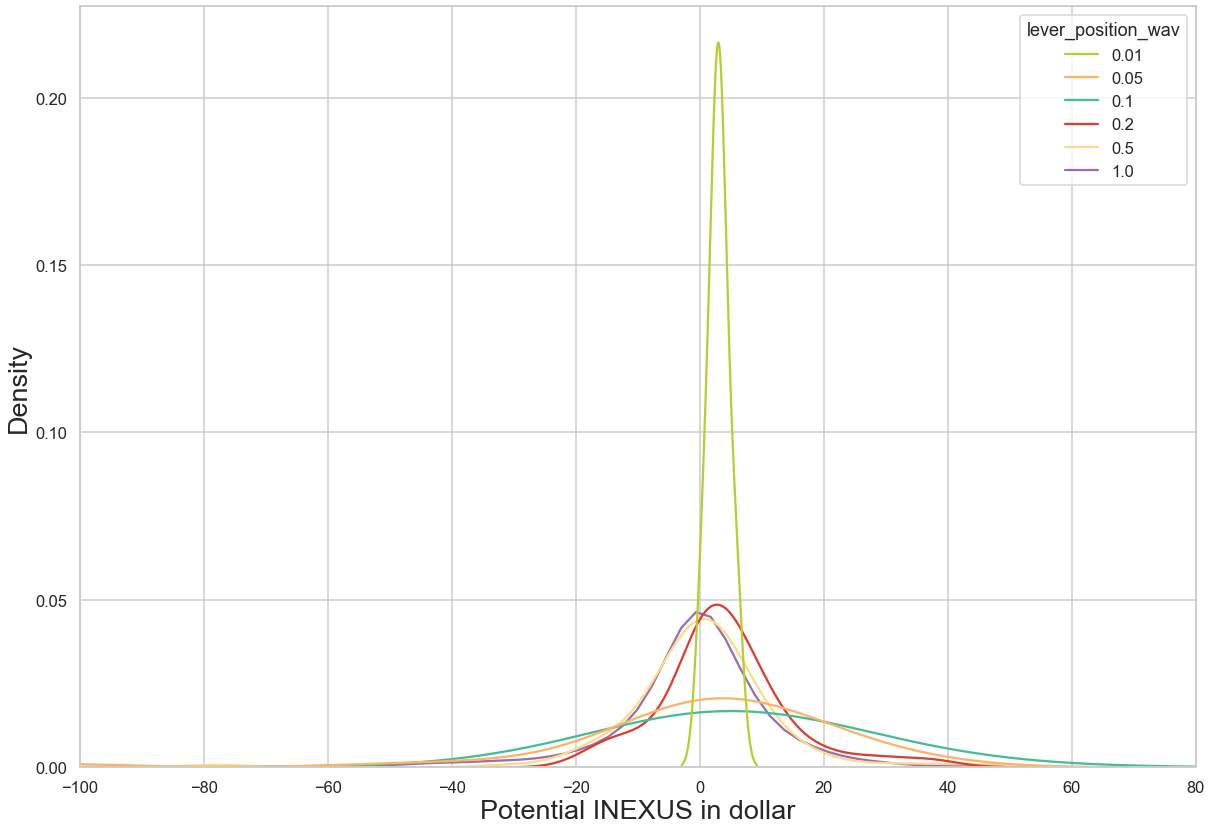

CPU times: total: 1.03 s
Wall time: 1.04 s


In [135]:
%%time
sns.set(rc={'figure.figsize':(20,14)}) # same mode cleaned data   
sns.set_context('talk')
sns.set_style("whitegrid", {'gridcolor': 'grainsboro'})

palette = ["#BBCC33", "#FDB366", "#44BB99", "#DD3D2D",
           "#FEDA8B", "#9970AB"]

sns.set_style("whitegrid")
sns.set_palette(palette)

sns.kdeplot(data=disabled_plan_succeed_rh_100_with_dummies, x="Potential_INEXUS_in_dollar_2023", hue="lever_position_wav", 
           fill=False, common_norm=False, alpha=1, palette=palette)
plt.xlim(-100, 80)
plt.xlabel('Potential INEXUS in dollar', fontsize=27)
plt.ylabel('Density', fontsize=27)
plt.show()

In [138]:
%%time
sf_stacked['potential_in_dollar_2023_relative_to_baseline'] = sf_stacked['Potential_INEXUS_in_dollar_2023'] - (sf_stacked['Potential_INEXUS_in_dollar_2023'].where(sf_stacked['lever_position_wav'].eq(0.01))
                                                                                                  .groupby([sf_stacked['IDMerged'],sf_stacked['tripIndex']])
                                                                                                   .transform('first')
                                                                                                   .convert_dtypes()) 

CPU times: total: 8min 2s
Wall time: 8min 1s


In [ ]:
%%time
sf_stacked['realized_in_dollar_2023_relative_to_baseline'] = sf_stacked['Realized_INEXUS_in_dollar_2023'] - (sf_stacked['Realized_INEXUS_in_dollar_2023'].where(sf_stacked['lever_position_price'].eq(0.01))
                                                                                                  .groupby([sf_stacked['IDMerged'],sf_stacked['tripIndex']])
                                                                                                   .transform('first')
                                                                                                   .convert_dtypes()) 

In [141]:
sf_stacked["mode_actual_baseline"] = np.where(sf_stacked['lever_position_wav']==0.01, sf_stacked["mode_choice_actual_BEAM"], None)

In [142]:
sf_stacked["mode_actual_baseline"] = sf_stacked.groupby(['IDMerged','tripIndex'])['mode_actual_baseline'].transform(lambda x: x.ffill().bfill())

KeyboardInterrupt: 

In [ ]:
same_mode_actual = sf_stacked[sf_stacked['mode_actual_baseline'] == sf_stacked_rh_price_clean1['mode_choice_actual_BEAM']]

In [ ]:
%%time
sns.set(rc={'figure.figsize':(20,14)})
sns.set_style("whitegrid", {'gridcolor': 'grainsboro'})
ax = sns.boxplot(x="potential_in_dollar_2023_relative_to_baseline", y="mode_choice_actual_4", order=["ride_hail","car","transit","walk/bike"], 
                 hue="lever_position_wav", hue_order = [9.6, 6.24, 4.32, 2.56, 1.76, 1.36, 1],
                 data=same_mode_actual, palette="rocket", showfliers=False)
ax.set_xlabel('Potential INEXUS in dollar relative to baseline', fontsize = 40)
ax.set_ylabel('Mode', fontsize = 40)
ax.xaxis.set_tick_params(labelsize = 28)
ax.set_yticklabels(['Ridehail', 'Car','Transit','Walk/Bike'], size = 36)
handles, _ = ax.get_legend_handles_labels()
# Specify the order of the levels in the hue variable
hue_order = ['960% Telework Trips',  '624% Telework Trips', '432% Telework Trips', '256% Telework Trips','176% Telework Trips', '136% Telework Trips', 'Baseline',]
# Create a dictionary that maps the levels of the hue variable to the corresponding colors in the palette
palette_dict = dict(zip(hue_order, sns.color_palette("rocket", n_colors=len(hue_order))))
# Create a new list of handles that corresponds to the order of the labels in the legend
handles = [handles[hue_order.index(label)] for label in hue_order]
# Use the new list of handles and the dictionary of colors to create the legend
ax.legend(handles, hue_order, loc="upper left", prop={'size': 36}, markerscale=3, fontsize=24, title_fontsize=30, bbox_to_anchor=(1, 1))
#plt.savefig('box_sameMode_potential.svg', bbox_inches='tight', dpi=300)
#plt.savefig('box_sameMode_potential.png', bbox_inches='tight', dpi = 300)

In [139]:
only_rh1 = sf_stacked[(sf_stacked['mode_choice_planned_BEAM'] == 'ride_hail')|
               (sf_stacked['mode_choice_planned_BEAM'] == 'ride_hail_pooled')]

In [140]:
only_rh1.loc[only_rh1['lever_position_wav'] == 1].shape

(298294, 113)

In [146]:
only_rh1.loc[only_rh1['lever_position_wav'] == 0.2].groupby('in_wheelchair')['tripIndex'].count()

in_wheelchair
False    310721
True       2914
Name: tripIndex, dtype: int64

In [163]:
only_rh1.loc[only_rh1['lever_position_wav'] == 1].groupby('in_wheelchair')['replanning_status'].apply(lambda x: (x > 0).sum())

in_wheelchair
False    98032
True       964
Name: replanning_status, dtype: int64

In [180]:
only_rh1_dis = only_rh1[only_rh1['in_wheelchair'] == True]

In [206]:
only_rh1_dis['mode_choice_planned'] = np.where((only_rh1_dis['mode_choice_planned_BEAM'] == 'ride_hail')|(only_rh1_dis['mode_choice_planned_BEAM'] == 'ride_hail_pooled'), 'ride_hail', np.nan)

C:\Users\nrezaei\AppData\Local\Temp\2\ipykernel_9468\3409893502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_rh1_dis['mode_choice_planned'] = np.where((only_rh1_dis['mode_choice_planned_BEAM'] == 'ride_hail')|(only_rh1_dis['mode_choice_planned_BEAM'] == 'ride_hail_pooled'), 'ride_hail', np.nan)


In [209]:
only_rh1_dis[only_rh1_dis['mode_choice_actual_4'] != only_rh1_dis['mode_choice_planned']]['mode_choice_actual_BEAM'].unique()

array(['car', 'walk', 'bike_transit', 'drive_transit', 'walk_transit',
       'bike'], dtype=object)

In [210]:
# Count rows where planned mode is the same as actual mode within each 'lever_position_wav' group
same_mode_counts = only_rh1_dis.groupby('lever_position_wav').apply(lambda x: (x['mode_choice_planned'] == x['mode_choice_actual_4']).sum())

# Count rows where planned mode is different from actual mode within each 'lever_position_wav' group
different_mode_counts = only_rh1_dis.groupby('lever_position_wav').apply(lambda x: (x['mode_choice_planned'] != x['mode_choice_actual_4']).sum())

In [211]:
same_mode_counts

lever_position_wav
0.010000     194
0.050000     610
0.100000    1089
0.200000    1404
0.500000    1928
1.000000    2048
dtype: int64

In [212]:
different_mode_counts

lever_position_wav
0.010000    347
0.050000    733
0.100000    916
0.200000    934
0.500000    986
1.000000    872
dtype: int64

In [229]:
rh_planned = {'lever_position_wav': [0.01, 0.05, 0.1 , 0.2 , 0.5 , 1],
              'planned_rh': [541,1343,2005,2338,2914,2920],
              'used_rh': [194, 610, 1089, 1404, 1928, 2048],
              'switched_mode': [347,733,916,934,986,872],
              'planned_rh_100': [2920, 2920, 2920, 2920, 2920, 2920],
              'replanning_num': [350,742,945,974,1074,964]}

In [230]:
df_rh_planned = pd.DataFrame(rh_planned)

In [240]:
df_rh_planned['replanning_rate'] = df_rh_planned['replanning_num']/df_rh_planned['planned_rh_100']

In [232]:
df_rh_planned['gave_up_rh'] = df_rh_planned['planned_rh_100']-df_rh_planned['planned_rh']

In [233]:
df_rh_planned['replanned_gave_up_rh'] = df_rh_planned['gave_up_rh']+df_rh_planned['replanning_num']

In [234]:
df_rh_planned['replanned_gave_up_rh_rate'] = df_rh_planned['replanned_gave_up_rh']/df_rh_planned['planned_rh_100']

In [235]:
df_rh_planned['switch_mode_rh_rate'] = df_rh_planned['switched_mode']/df_rh_planned['planned_rh_100']

In [237]:
df_rh_planned['switch_mode_gave_up_rh'] =  df_rh_planned['gave_up_rh']+df_rh_planned['switched_mode']

In [238]:
df_rh_planned['switch_mode_up_rh_rate'] = df_rh_planned['switch_mode_gave_up_rh']/df_rh_planned['planned_rh_100']

In [241]:
df_rh_planned

,lever_position_wav,planned_rh,used_rh,switched_mode,planned_rh_100,replanning_num,gave_up_rh,replanned_gave_up_rh,replanned_gave_up_rh_rate,switch_mode_rh_rate,switch_mode_gave_up_rh,switch_mode_up_rh_rate,replanning_rate
0,0.010000,541,194,347,2920,350,2379,2729,0.934589,0.118836,2726,0.933562,0.119863
1,0.050000,1343,610,733,2920,742,1577,2319,0.794178,0.251027,2310,0.791096,0.254110
2,0.100000,2005,1089,916,2920,945,915,1860,0.636986,0.313699,1831,0.627055,0.323630
3,0.200000,2338,1404,934,2920,974,582,1556,0.532877,0.319863,1516,0.519178,0.333562
4,0.500000,2914,1928,986,2920,1074,6,1080,0.369863,0.337671,992,0.339726,0.367808
5,1.000000,2920,2048,872,2920,964,0,964,0.330137,0.298630,872,0.298630,0.330137


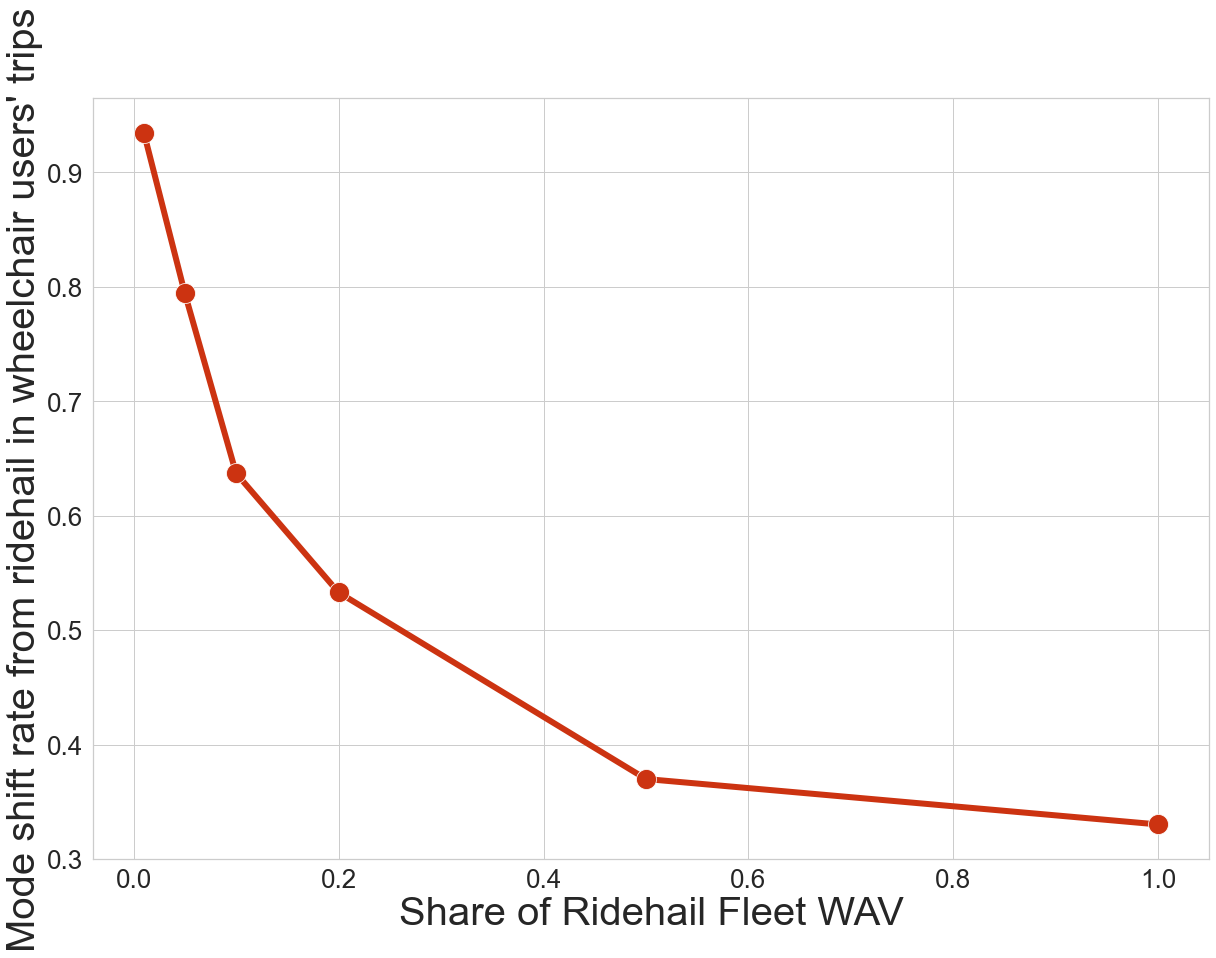

In [248]:
sns.set(rc={'figure.figsize':(20,14)})
sns.set_theme(style="whitegrid")
colors = ['#F4A582'] #'#CC3311','#009988', '#F4A582', '#BBCC33'
ax = sns.lineplot(data = df_rh_planned, x = 'lever_position_wav', 
                  y = 'replanned_gave_up_rh_rate', marker='o',
                  markersize=20, ci=None, linewidth = 6, color='#CC3311')
ax.set_xlabel('Share of Ridehail Fleet WAV', fontsize = 40)
ax.set_ylabel("Mode shift rate from ridehail in wheelchair users' trips", fontsize = 40)
ax.yaxis.set_tick_params(labelsize = 26)
ax.xaxis.set_tick_params(labelsize = 26)

#plt.legend(labels = ['Not disabled', 'Disabled'],
         #fontsize='small', fancybox=False, bbox_to_anchor=(1, 0.5), ncol=1, frameon=True, loc = 'best', prop={'size': 40})

In [272]:
total_wav_trips = sf_stacked[sf_stacked['lever_position_wav'] == 1]['mode_choice_actual_BEAM'].count()

In [274]:
sf_stacked['mode_split_wav'] = (sf_stacked.groupby(['mode_choice_actual_BEAM', 'lever_position_wav'])['mode_choice_actual_BEAM'].transform('count') / total_wav_trips) * 100

In [250]:
# Generate rh_actual and rh_planned columns
sf_stacked['rh_actual'] = sf_stacked['mode_choice_actual_BEAM'].isin(['ride_hail', 'ride_hail_pooled'])
sf_stacked['rh_planned'] = sf_stacked['mode_choice_planned_BEAM'].isin(['ride_hail', 'ride_hail_pooled'])

In [269]:
# Create the disabled column and replace values
sf_stacked['disabled'] = 0
sf_stacked.loc[sf_stacked['in_wheelchair'] == 1, 'disabled'] = 1
sf_stacked.loc[sf_stacked['in_wheelchair'] == 2, 'disabled'] = 0

In [ ]:
# Generate normalized columns
for mode in modes:
    max_value = sf_stacked.loc[sf_stacked['lever_position_wav'] == 1, mode].max()
    sf_stacked[f'{mode}_norm'] = sf_stacked[mode] - max_value

# Generate scatterplots for normalized values and save them as EPS files
for mode in modes:
    for disabled in [1, 0]:
        filtered_data = sf_stacked[(sf_stacked['disabled'] == disabled) & (sf_stacked['lever_position'] == 1)]
        plt.scatter(filtered_data[f'{mode}_norm'], filtered_data['lever_position'], color=colors[disabled], label=labels[disabled])
    
    plt.xlabel(f'Share of ridehail fleet WAV (relative to 100% WAV ridehail fleet) - {mode}')
    plt.ylabel('Lever position')
    plt.legend()
    plt.savefig(f'modesplit_{mode}_norm.eps')
    plt.clf()

# Drop unnecessary columns
data = sf_stacked.drop(columns=['mode_actual4', 'mode_actual5', 'mode_actual6', 'mode_actual8', 'mode_actual13'])

# Generate stacked bar graph
modes_for_stack = ['mode_act_car', 'mode_act_teleport', 'mode_act_walk', 'mode_act_transit', 'mode_act_bike',
                   'mode_act_ridehail_transit', 'mode_act_ride_hail_pool', 'mode_act_ride_hail']

grouped_data = data.groupby(['lever_position', 'disabled'])[modes_for_stack].sum()
grouped_data.plot(kind='bar', stacked=True)
plt.savefig('stacked_bar_graph.eps')

In [31]:
only_rh = sf_stacked[(sf_stacked['mode_choice_actual_BEAM'] == 'ride_hail')|
               (sf_stacked['mode_choice_actual_BEAM'] == 'ride_hail_pooled')|
               (sf_stacked['mode_choice_planned_BEAM'] == 'ride_hail')|
               (sf_stacked['mode_choice_planned_BEAM'] == 'ride_hail_pooled')]

In [32]:
only_rh['replanned'] = only_rh['replanning_status'].apply(lambda x: 1 if x > 0 else 0)

C:\Users\nrezaei\AppData\Local\Temp\3\ipykernel_15348\2770517484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_rh['replanned'] = only_rh['replanning_status'].apply(lambda x: 1 if x > 0 else 0)


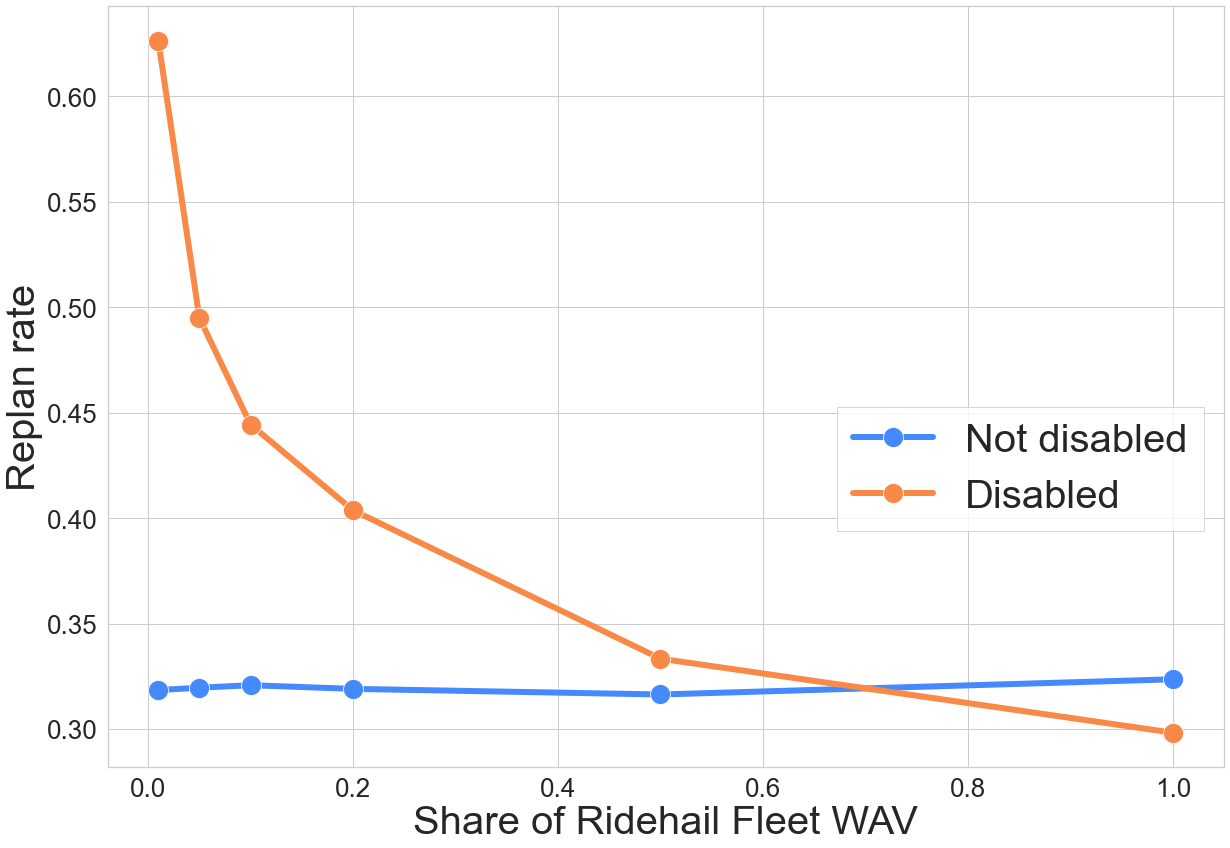

In [33]:
sns.set(rc={'figure.figsize':(20,14)})
sns.set_theme(style="whitegrid")
colors = ['#458AFC', '#F88947'] #'#CC3311','#009988', '#F4A582', '#BBCC33'
ax = sns.lineplot(data = only_rh, x = 'lever_position_wav', 
                  y = 'replanned', marker='o', hue = 'in_wheelchair',
                  markersize=20, ci=None, linewidth = 6, palette=colors)
ax.set_xlabel('Share of Ridehail Fleet WAV', fontsize = 40)
ax.set_ylabel('Replan rate', fontsize = 40)
ax.yaxis.set_tick_params(labelsize = 26)
ax.xaxis.set_tick_params(labelsize = 26)

plt.legend(labels = ['Not disabled', 'Disabled'],
         fontsize='small', fancybox=False, bbox_to_anchor=(1, 0.5), ncol=1, frameon=True, loc = 'best', prop={'size': 40})

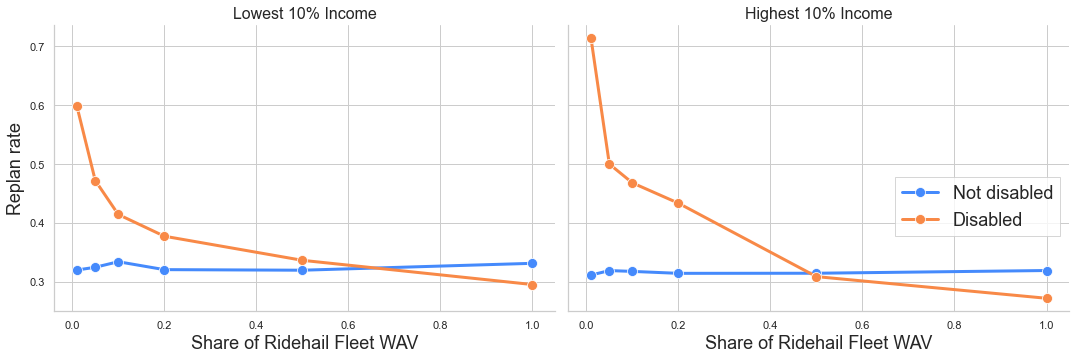

In [34]:
sns.set(rc={'figure.figsize': (20, 14)})
sns.set_theme(style="whitegrid")

colors = ['#458AFC', '#F88947'] #'#CC3311','#009988', '#F4A582', '#BBCC33'

grid = sns.FacetGrid(only_rh.loc[(only_rh['income_deciles'] == '1stD') | (only_rh['income_deciles'] == '10thD')],
                     col='income_deciles', hue='in_wheelchair', height=5, aspect=1.5, palette=colors, legend_out=True)

grid.map(sns.lineplot, 'lever_position_wav', 'replanned', marker='o', 
         ci=None, markersize=10,  linewidth = 3)

for ax, title in zip(grid.axes.flat, ['Lowest 10% Income','Highest 10% Income']):
    ax.set_title(title, fontdict={'fontsize': 16})

grid.set_xlabels('Share of Ridehail Fleet WAV', size=18)
grid.set_ylabels('Replan rate', size=18)

plt.legend(labels = ['Not disabled', 'Disabled'],
         fontsize='small', fancybox=False, bbox_to_anchor=(1, 0.5), ncol=1, frameon=True, loc = 'best', prop={'size': 18})

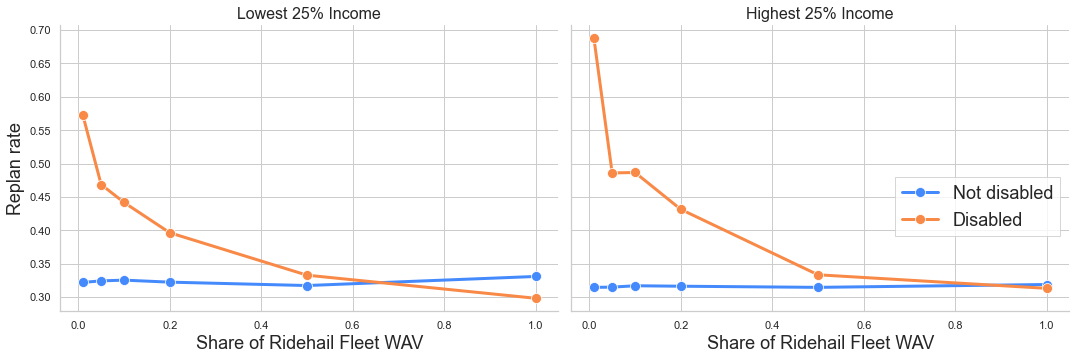

In [35]:
sns.set(rc={'figure.figsize': (20, 14)})
sns.set_theme(style="whitegrid")

colors = ['#458AFC', '#F88947'] #'#CC3311','#009988', '#F4A582', '#BBCC33'

grid = sns.FacetGrid(only_rh.loc[(only_rh['income_quartiles'] == '1stQ') | (only_rh['income_quartiles'] == '4thD')],
                     col='income_quartiles', hue='in_wheelchair', height=5, aspect=1.5, palette=colors, legend_out=True)

grid.map(sns.lineplot, 'lever_position_wav', 'replanned', marker='o', 
         ci=None, markersize=10,  linewidth = 3)

for ax, title in zip(grid.axes.flat, ['Lowest 25% Income','Highest 25% Income']):
    ax.set_title(title, fontdict={'fontsize': 16})

grid.set_xlabels('Share of Ridehail Fleet WAV', size=18)
grid.set_ylabels('Replan rate', size=18)

plt.legend(labels = ['Not disabled', 'Disabled'],
         fontsize='small', fancybox=False, bbox_to_anchor=(1, 0.5), ncol=1, frameon=True, loc = 'best', prop={'size': 18})

In [103]:
actual_rh = sf_stacked[(sf_stacked['mode_choice_actual_BEAM'] == 'ride_hail')|
                       (sf_stacked['mode_choice_actual_BEAM'] == 'ride_hail_pooled')]

In [125]:
actual_rh = actual_rh[actual_rh['waitTime_replanning_min']<7]

In [126]:
disabled_data = actual_rh[actual_rh['in_wheelchair']]
not_disabled_data = actual_rh[~actual_rh['in_wheelchair']]

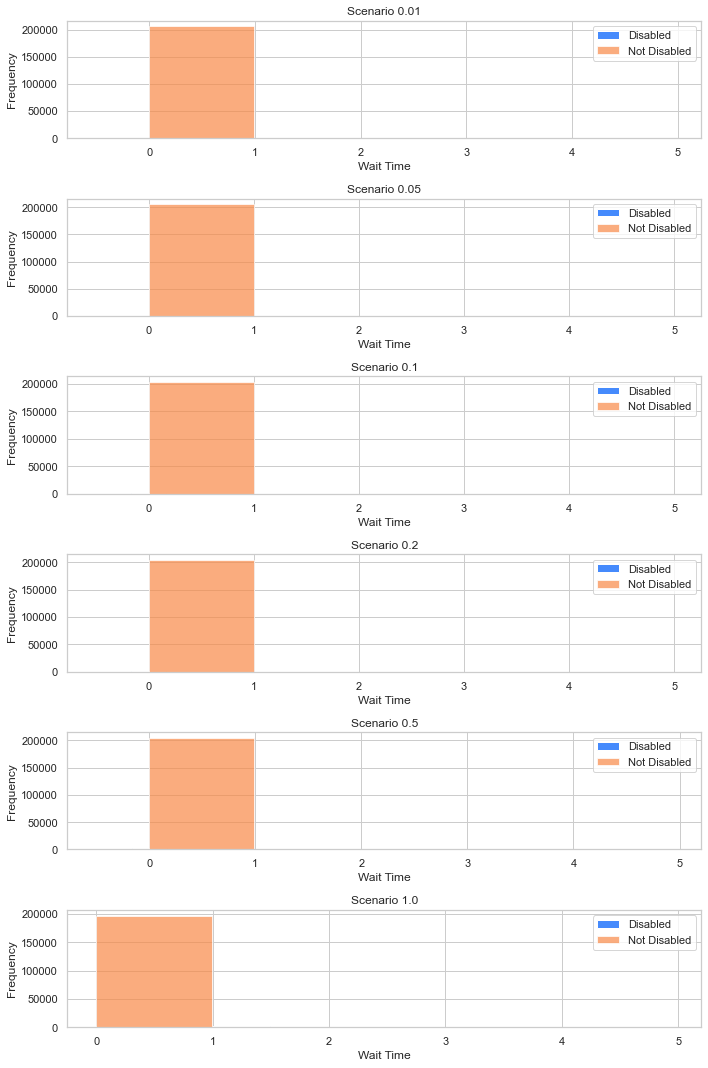

In [122]:
# Create subplots with 5 rows and 1 column
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(10, 15))

# Iterate over each scenario and plot the histograms
for i, (scenario, group) in enumerate(actual_rh.groupby('lever_position_wav')):
    ax = axes[i]
    
    # Plot disabled group
    ax.hist(group[group['in_wheelchair']]['waitTime_replanning_min'], bins=3, alpha=1, color=colors[0], label='Disabled')
    
    # Plot not disabled group
    ax.hist(group[~group['in_wheelchair']]['waitTime_replanning_min'], bins=5, alpha=0.7, color=colors[1], label='Not Disabled')
    
    ax.set_title(f"Scenario {scenario}")
    ax.legend()
    ax.set_xlabel("Wait Time")
    ax.set_ylabel("Frequency")

# Add spacing between subplots and display the plot
plt.tight_layout()
plt.show()

In [53]:
cd = sf_stacked.groupby(['lever_position_wav', 'in_wheelchair'])['mode_choice_actual_BEAM'].value_counts(normalize=True,sort=False).reset_index(name='Percentage')

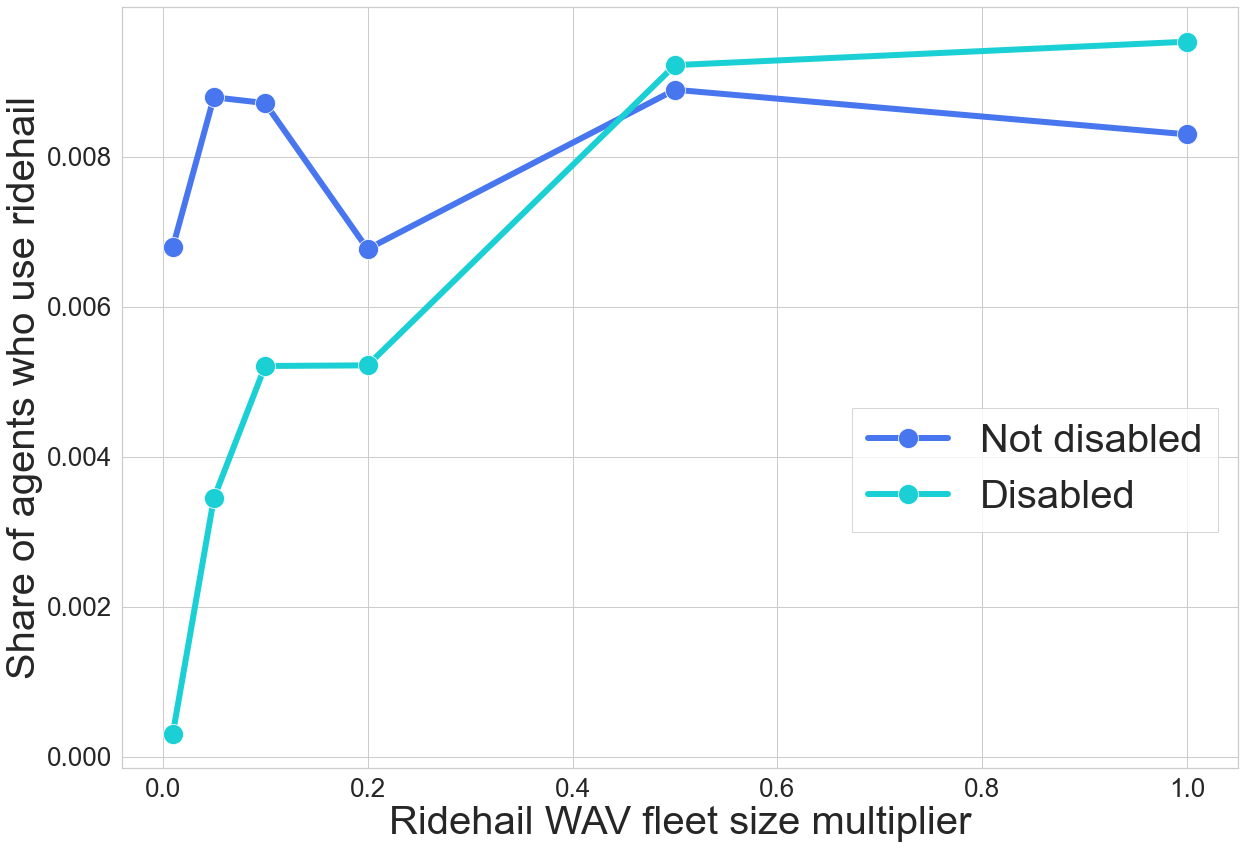

In [54]:
sns.set(rc={'figure.figsize':(20,14)})
sns.set_theme(style="whitegrid")
sns.set_palette("turbo")
ax = sns.lineplot(data = cd.loc[(cd['mode_choice_actual_BEAM']=='ride_hail')|
                               (cd['mode_choice_actual_BEAM']=='ride_hail_pooled')], x = 'lever_position_wav', 
                  y = 'Percentage', marker='o', hue = 'in_wheelchair',
                  markersize=20, ci=None, linewidth = 6)
ax.set_xlabel('Ridehail WAV fleet size multiplier', fontsize = 40)
ax.set_ylabel('Share of agents who use ridehail', fontsize = 40)
ax.yaxis.set_tick_params(labelsize = 26)
ax.xaxis.set_tick_params(labelsize = 26)

plt.legend(labels = ['Not disabled', 'Disabled'],
         fontsize='small', fancybox=False, bbox_to_anchor=(1, 0.5), ncol=1, frameon=True, loc = 'best', prop={'size': 40})
#plt.savefig('share_agents_ridehail_WAV.svg', format='svg')
#plt.savefig('share_agents_ridehail_WAV.png', dpi=500)

In [56]:
sf_stacked['denial'] = np.where(sf_stacked['replanning_status'] > 0, 1, 0)

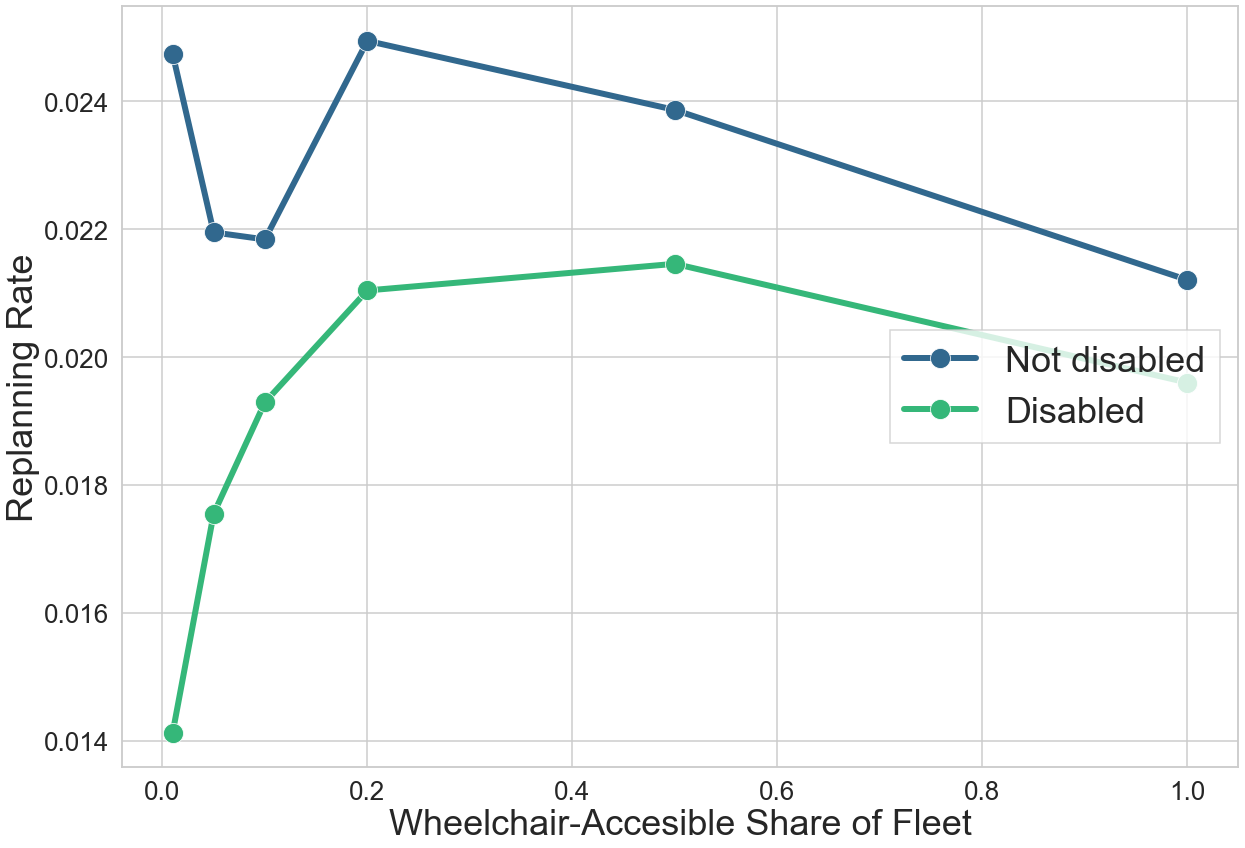

In [105]:
sns.set(rc={'figure.figsize': (20, 14)})
sns.set_context('talk')
sns.set_style("whitegrid", {'gridcolor': 'grainsboro'})

grid = sns.lineplot(data=sf_stacked, x='lever_position_wav', y='denial', hue='in_wheelchair',
                    palette='viridis', marker='o', ci=None, markersize=20,  linewidth = 6)


plt.legend(labels = ['Not disabled', 'Disabled'],
         fontsize='small', fancybox=False, ncol=1, frameon=True, loc = 'right', prop={'size': 36})

grid.set_xlabel('Wheelchair-Accesible Share of Fleet', fontsize = 36)
grid.set_ylabel('Replanning Rate', fontsize = 36)
grid.yaxis.set_tick_params(labelsize = 26)
grid.xaxis.set_tick_params(labelsize = 26)

#plt.legend(bbox_to_anchor = (1.40, 1.02), fontsize = 10)
#plt.savefig('Replanning2.tif', bbox_inches='tight', dpi=300)

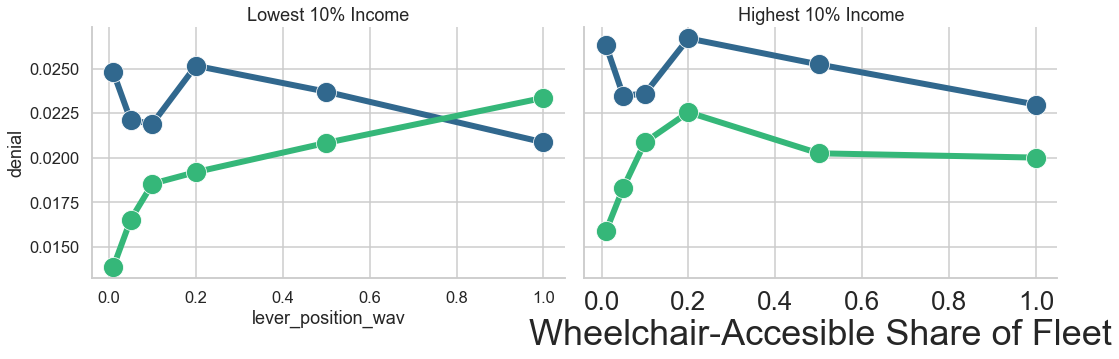

In [107]:
sns.set(rc={'figure.figsize': (20, 14)})
sns.set_context('talk')
sns.set_style("whitegrid", {'gridcolor': 'grainsboro'})

grid = sns.FacetGrid(sf_stacked.loc[(sf_stacked['income_deciles'] == '1stD') | (sf_stacked['income_deciles'] == '10thD')],
                     col='income_deciles', hue='in_wheelchair', height=5, aspect=1.5, palette='viridis', legend_out=True)

grid.map(sns.lineplot, 'lever_position_wav', 'denial', marker='o', 
         ci=None, markersize=10,  linewidth = 3)


for ax, title in zip(grid.axes.flat, ['Lowest 10% Income','Highest 10% Income']):
    ax.set_title(title)

#ax.set_xlabel('Wheelchair-Accesible Share of Fleet', fontsize = 36)
#ax.set_ylabel('Replanning Rate', fontsize = 36)
#ax.yaxis.set_tick_params(labelsize = 26)
#ax.xaxis.set_tick_params(labelsize = 26)

In [133]:
income_sf_stacked = sf_stacked.loc[(sf_stacked['income_deciles'] == '1stD')|(sf_stacked['income_deciles'] == '10thD')]

In [140]:
rh_sf_stacked = sf_stacked.loc[(sf_stacked['mode_choice_actual_BEAM'] == 'ride_hail')|(sf_stacked['mode_choice_actual_BEAM'] == 'ride_hail_pooled')]

In [150]:
rh_sf_stacked.shape

(1186865, 95)

In [163]:
ride_hail_users = rh_sf_stacked.groupby('lever_position_wav')['tripIndex'].nunique().reset_index()

In [164]:
#ride_hail_users.rename(columns={'trip_id': 'ride_hail_users'}, inplace=True)

# Merge the ride_hail_users DataFrame with the original DataFrame
df = pd.merge(rh_sf_stacked, ride_hail_users, on='lever_position_wav', how='left')

In [165]:
# Calculate the replanning rate per user or vehicle
df['replanning_rate'] = df['denial'] / df['tripIndex_y']

In [166]:
#mean_replanning = rh_sf_stacked.groupby(['in_wheelchair', 'lever_position_wav'])['denial'].mean().reset_index()